In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [64]:
df = pd.read_csv('used_cars.csv')
df.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW


In [65]:
df = df.drop('Unnamed: 0',axis=1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   Make          99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.6+ MB


In [67]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [68]:
df.shape

(99187, 10)

In [69]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [70]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW


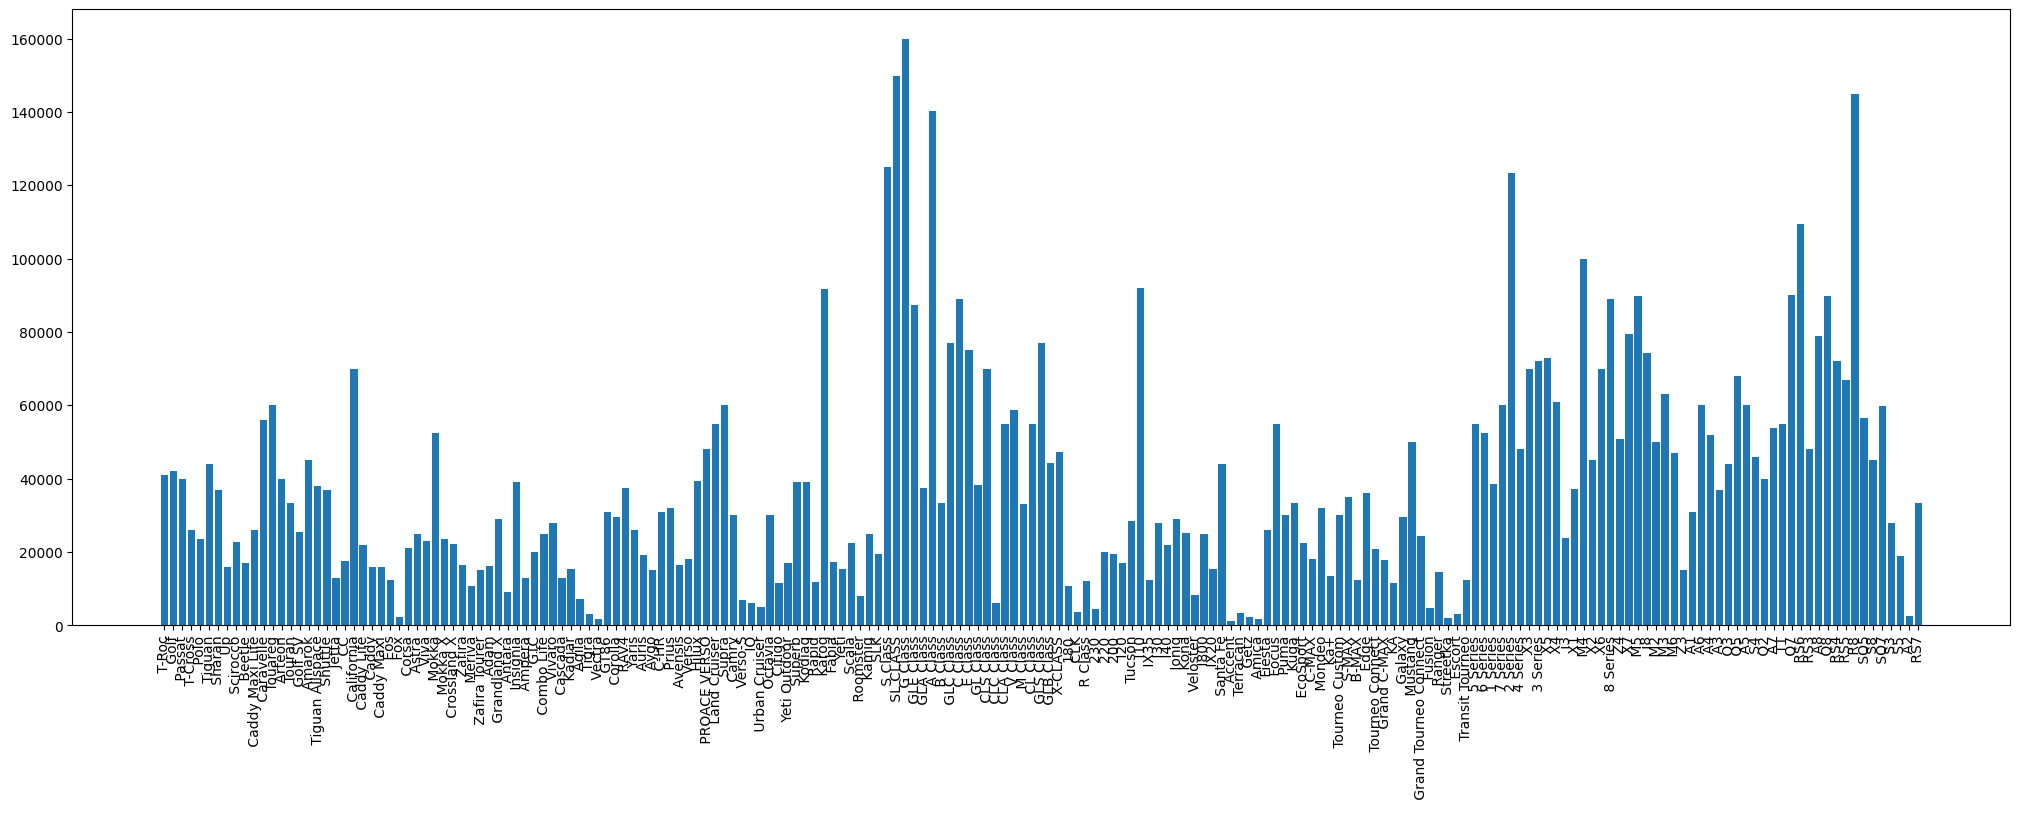

In [86]:
plt.figure(figsize=(25,8))
plt.bar(df.model,df.price)
plt.xticks(rotation=90)
plt.show()

### Car model like G Class,Sl class ,A class and R8 are more in number as compared to other models

([0, 1, 2, 3],
 [Text(0, 0, 'Automatic'),
  Text(1, 0, 'Manual'),
  Text(2, 0, 'Semi-Auto'),
  Text(3, 0, 'Other')])

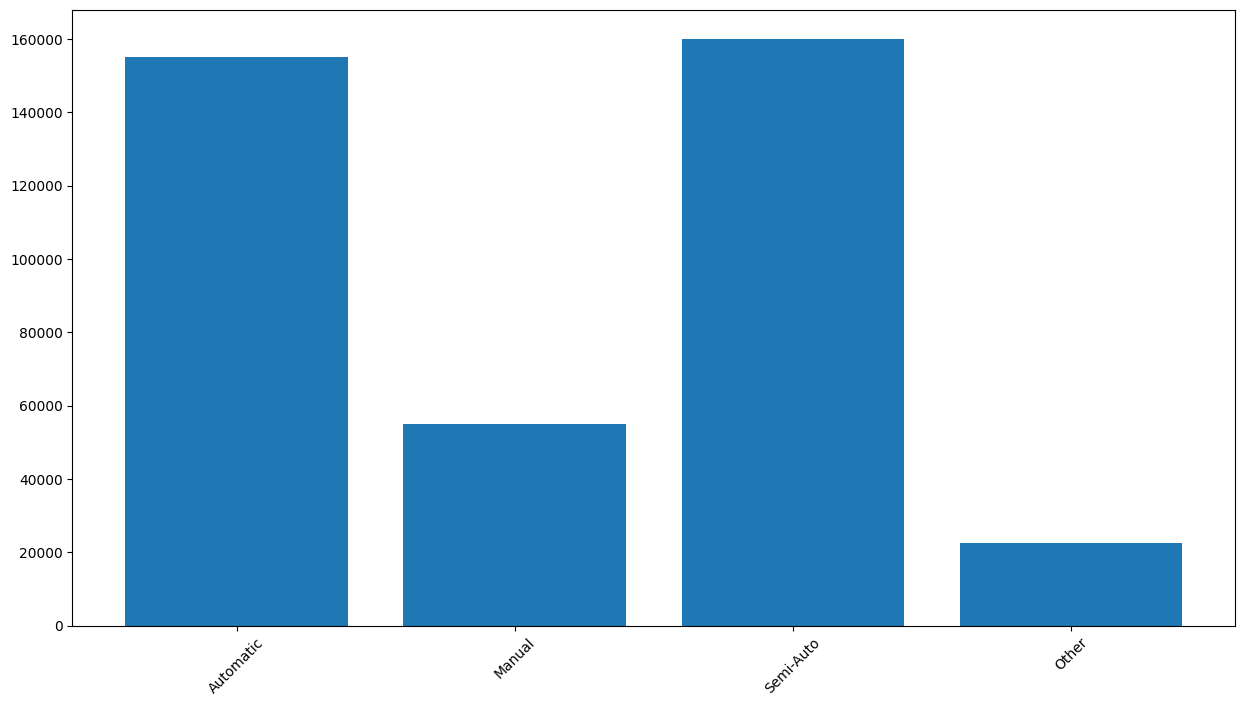

In [76]:
plt.figure(figsize=(15,8))
plt.bar(df.transmission,df.price)
plt.xticks(rotation=45)


### Automatic and semi-automatic cars are more as compared to manual and other cars

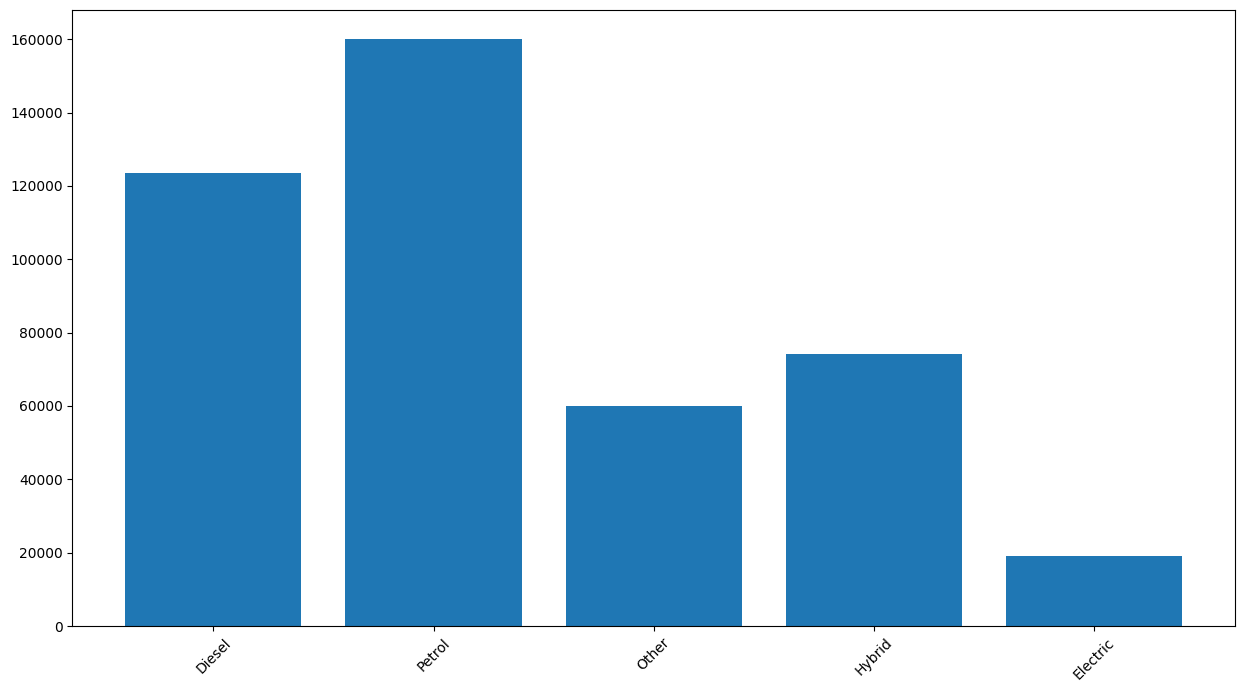

In [77]:
plt.figure(figsize=(15,8))
plt.bar(df.fuelType,df.price)
plt.xticks(rotation=45)
plt.show()

### Petrol cars are more as compared to other cars

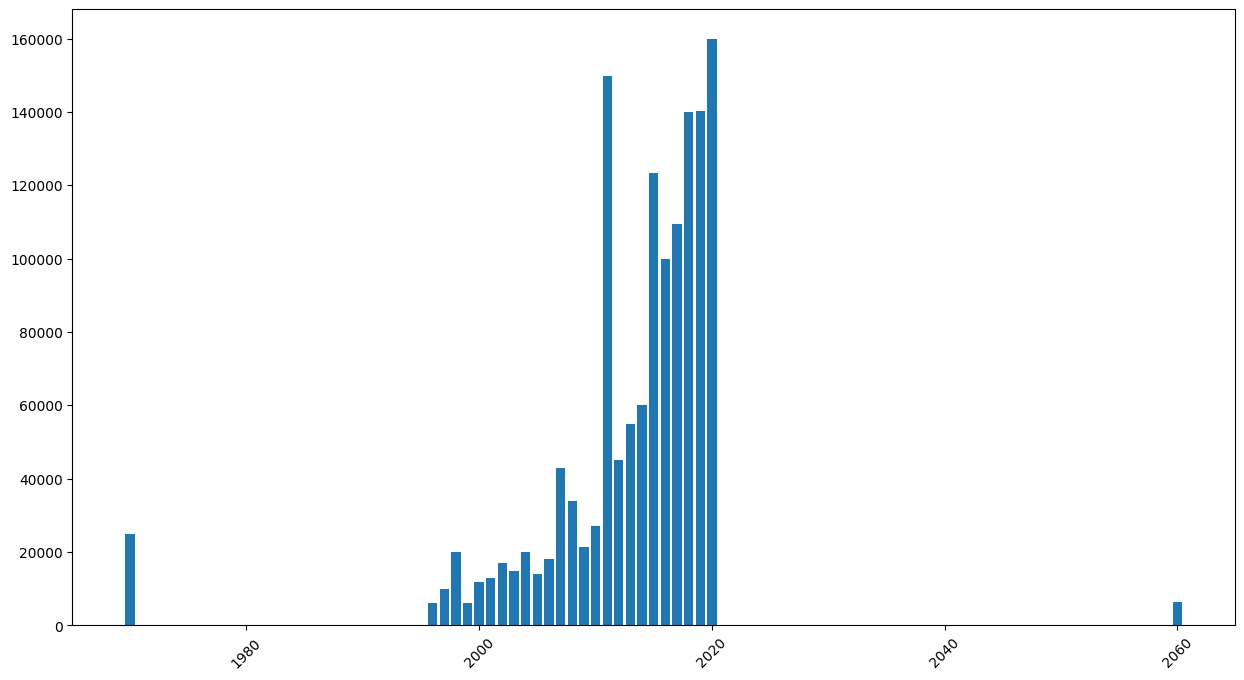

In [81]:
plt.figure(figsize=(15,8))
plt.bar(df.year,df.price)
plt.xticks(rotation=45)
plt.show()

### As year of purchase increases the price of cars also increases

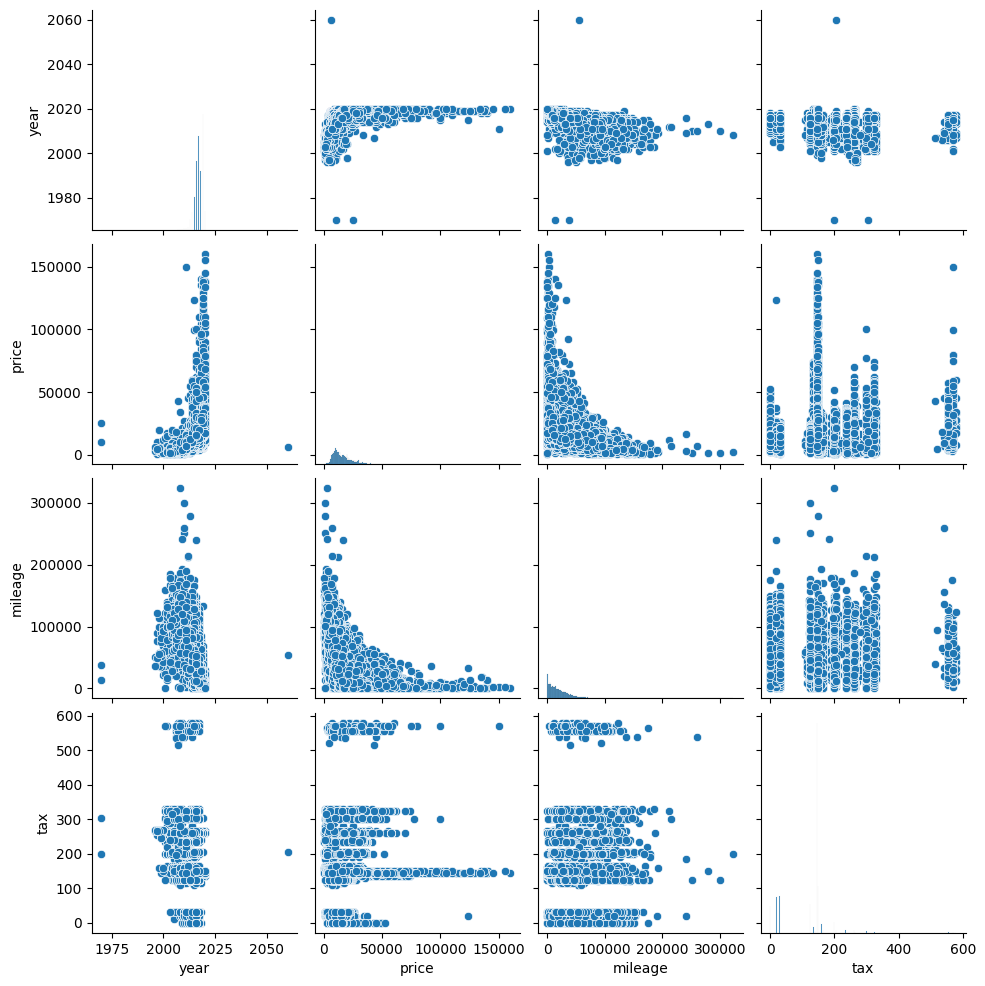

In [82]:
sns.pairplot(df.select_dtypes(include='int64'))

### looking at above pairplot ,it shows that there is a correlation between the price and mileage also price and year

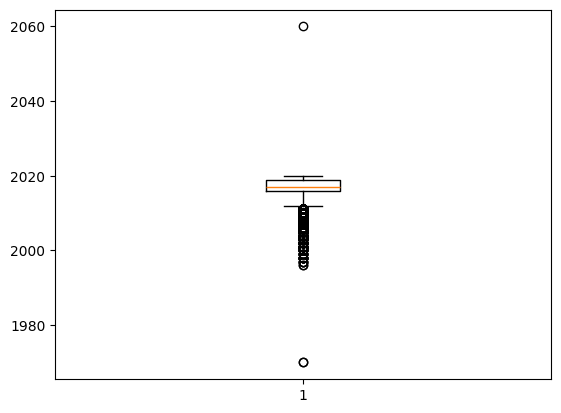

In [84]:
plt.boxplot(df.year)
plt.show()

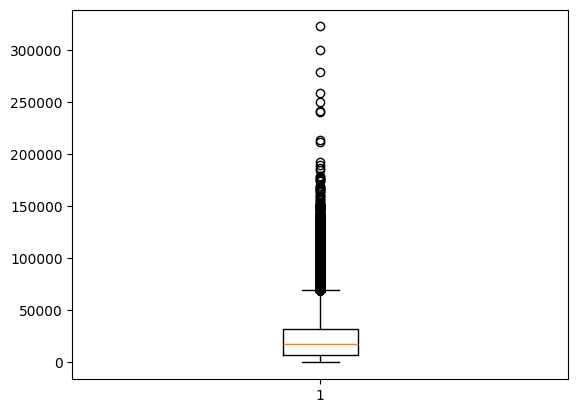

In [85]:
plt.boxplot(df.mileage)
plt.show()

### Converting Categorical Data to numeric data

In [16]:
le = LabelEncoder()
df['model'] = le.fit_transform(df['model'])
df['transmission'] = le.fit_transform(df['transmission'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['Make'] = le.fit_transform(df['Make'])

In [63]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,153,2019,25000,0,13904,0,145,49.6,2.0,2
1,153,2019,26883,0,4562,0,145,49.6,2.0,2
2,153,2019,20000,1,7414,0,145,50.4,2.0,2
3,153,2019,33492,0,4825,4,145,32.5,2.0,2
4,153,2019,22900,3,6500,4,150,39.8,1.5,2


In [18]:
labels = le.classes_
values = le.transform(le.classes_)

for label, value in zip(labels, values):
    print(f'Label: {label}, Value: {value}')


Label: Audi, Value: 0
Label: BMW, Value: 1
Label: VW, Value: 2
Label: ford, Value: 3
Label: hyundi, Value: 4
Label: merc, Value: 5
Label: skoda, Value: 6
Label: toyota, Value: 7
Label: vauxhall, Value: 8


### Correlation between columns

In [20]:
cm = df.corr()
cm

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
model,1.000000,0.031224,0.047118,-0.035061,-0.047814,0.014087,0.108224,-0.125939,-0.003722,0.076198
year,0.031224,1.000000,0.490829,0.143309,-0.738604,0.077549,0.195693,-0.132791,-0.038576,-0.013574
price,0.047118,0.490829,1.000000,0.242976,-0.417954,-0.225946,0.307648,-0.296429,0.638114,-0.291611
transmission,-0.035061,0.143309,0.242976,1.000000,-0.125829,-0.061897,0.073268,-0.106264,0.150166,-0.139120
mileage,-0.047814,-0.738604,-0.417954,-0.125829,1.000000,-0.231425,-0.220761,0.185657,0.109073,-0.029980
fuelType,0.014087,0.077549,-0.225946,-0.061897,-0.231425,1.000000,0.102234,-0.231552,-0.511474,0.188479
tax,0.108224,0.195693,0.307648,0.073268,-0.220761,0.102234,1.000000,-0.451451,0.278411,-0.013857
mpg,-0.125939,-0.132791,-0.296429,-0.106264,0.185657,-0.231552,-0.451451,1.000000,-0.248210,0.029162
engineSize,-0.003722,-0.038576,0.638114,0.150166,0.109073,-0.511474,0.278411,-0.248210,1.000000,-0.245963
Make,0.076198,-0.013574,-0.291611,-0.139120,-0.029980,0.188479,-0.013857,0.029162,-0.245963,1.000000


<Axes: >

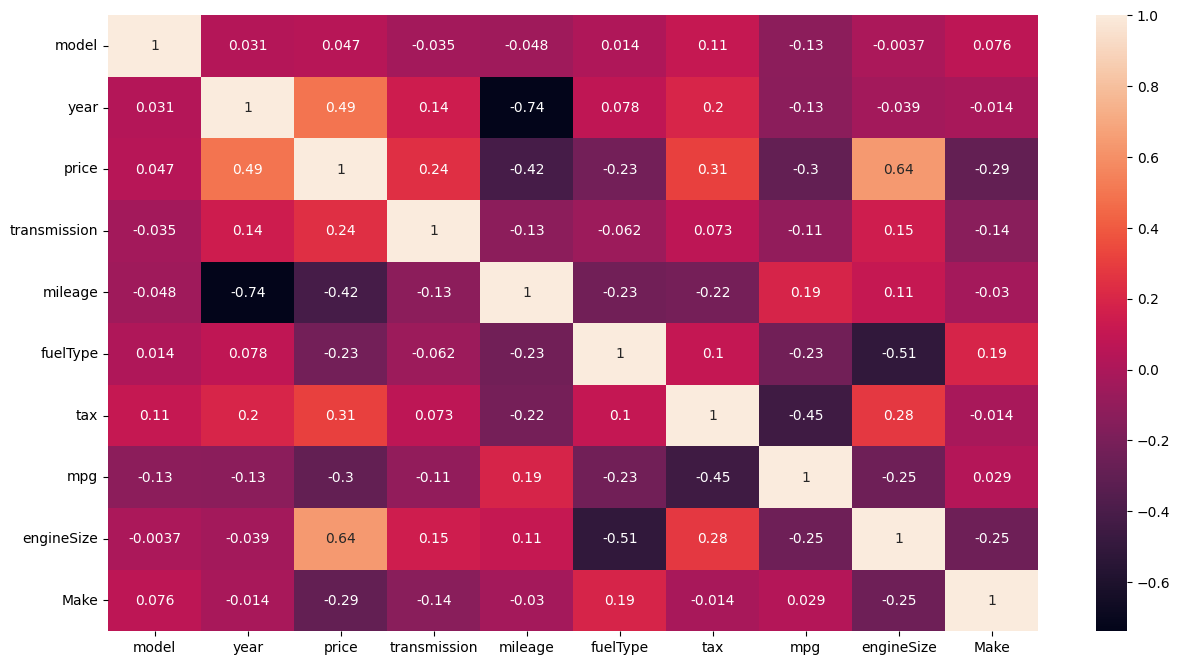

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True)

### Looking at above plot we can see that year,transmission,mileage,fuelType,tax,mpg,engineSize and Make have significant correlation with Price
### So we can select them as independent variables

In [28]:
X = df.drop(['price','model'],axis=1)
y = df['price']

### Spliting data into train and test sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Applying scalerization to the data to increase performance of model

In [55]:
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.fit_transform(X_test)

### Building Random Forest Regressor model

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [57]:
y_pred = rf.predict(X_test)

In [58]:
rf.score(X_test,y_test)

0.9125356117191815

## R_2 score of model

In [59]:
from sklearn.metrics import mean_squared_error,r2_score,median_absolute_error

r2_score(y_pred, y_test)

0.9016341036552806

### Looking R_2 score of model ,our model accuracy is 90 % so our model can perform better on unseen data 

### Mean squared error

In [60]:
mse = mean_squared_error(y_pred, y_test)
mse

8607541.259076966

### Median absolute error

In [61]:
mae = median_absolute_error(y_pred, y_test)
mae

939.7800000000007

### Root mean squared error

In [62]:
from math import sqrt
sqrt(mse)

2933.8611519765154